## **Feature Engineering**
> Feature Engineering is the artistic side of data science wherein there is no one specific operation because the creation of features is driven by business insights and other things found in EDA. This is the most important part of the Machine Learning part of data science as it prepares the dataset to make sure that the model performs the best as it could.

The main objectives of feature engineering are to transform the dataset so that it will be compatible with a machine learning model and improve the performance of the machine learning model. When dealing with a raw dataset, you will encounter continuous and categorical values. A machine learning model cannot work with these values unless it is transformed with the techniques we hope to equip you with in this notebook. After going through this notebook, you should be able to handle continuous and categorical values.

In [1]:
# Import libraries & packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

### **The dataset we will be using contains information on the prices of flights between India's top 6 metro cities.**

Below is a description of the dataset's features:
1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

In [2]:
# Import dataset
df = pd.read_csv("flight_prices.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


> Now that we have imported the dataset and have seen its initial features, its time to get down to business. First of all, let us get rid of any columns that do not hold any weight or value for our machine learning model. *Unnamed: 0* is a column that serves as a unique identifiers for rows, thus they do not really indicate anything and have no value. We can start by dropping these columns.

In [3]:
# Drop Unnamed column because it is just an unique identifier column, thus it holds no value for the machine learning model.
df = df.drop(columns=['Unnamed: 0'])

In [4]:
# Shows detailed information on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


> As seen above, a lot of the dataset's columns are objects or ints. It's important to always check the data types of our features and make sure that it can be processed by our machine learning model. Ideally, a float is always best as it is within the range of real numbers which has more precision compared to integers. So, we can start by converting all *int64* columns into *float64*.

In [5]:
# Convert days_left and price columns from int to float
df['days_left'] = df['days_left'].astype(float)
df['price'] = df['price'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


## **Handling Categorical Features**
An example of a categorical feature in a dataset would be gender since it is non-numerical and can be divided into specific groups. They have a specified range of values.

In this dataset, there is a total of 8 categorical features.
- airline
- flight
- source_city
- departure_time
- stops
- arrival_time
- destination_city
- class

These non-numerical values need to be converted to integers or floats so that a machine learning model can utilize them. We can do so with LabelEncoder which assigns an integer starting from 0 to each category in a categorical feature, and OneHotEncoder which creates more columns for each category in a categorical feature and assigns a boolean-like value to each column with 0 and 1. Lets take a deeper dive into these two methods of handling categorical features.

In [7]:
# Get all unique values in airline feature
airlines = np.sort(df['airline'].unique())
airlines

array(['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet',
       'Vistara'], dtype=object)

### **Transforming airline feature**
Let's get started with the first categorical feature which is the airline of the flight. There are 6 unique airlines in this dataset as seen above. We will use LabelEncoder to assign a numerical value for each airline. We do this because machine learing algorithms can only deal with numbers. This means that transforming categorical values into numerics is necessary so that it will be machine-readable.

In [8]:
# Get LabelEncoder object from sklearn.preprocessing
label_encoder = LabelEncoder()

# Create array containing the labelled values of the airline feature
labelled = label_encoder.fit_transform(df['airline'])
labelled

array([4, 4, 0, ..., 5, 5, 5])

### **But wait!**
Using LabelEncoder is not enough for this particular feature because it may mislead our machine learning model. How so? Well, what we have currently done is assigned an integer from 0 to 5 for each of the airlines. However, the machine learning model may think that one airline is higher than the other simply because its numerical value is higher. It may end up making unwanted relationships such as that when the numerical value of the airline feature goes up, so does the price. This is certainly not logical and necessarily the case. In order to avoid this, we need to use **OneHotEncoder**.

In [9]:
# Reshape the array first so that it will be compatible with OneHotEncoder
labelled = labelled.reshape(-1, 1)
labelled

array([[4],
       [4],
       [0],
       ...,
       [5],
       [5],
       [5]])

In [10]:
onehot_encoder = OneHotEncoder(sparse=False)
onehotted = onehot_encoder.fit_transform(labelled)
onehotted

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

> As you can see above, OneHotEncoder has made it so that there are 6 new columns/features. Among these 6 new features, only one will have a value of 1, and whichever feature it is will indicate the airline. Now, all of the categorical values will not be ranked anymore since it will all have either a value of 0 or 1. If you encounter categorical values that are ordinal or are ranked, then using LabelEncoder only will suffice.

In [11]:
# Add transformed airline feature to dataset and drop raw airline feature
df_airline_onehotted = pd.DataFrame(onehotted, columns=airlines)
df = pd.concat([df, df_airline_onehotted], axis=1)
df = df.drop(columns=['airline'])
df.head()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,0.0,0.0,0.0,0.0,1.0,0.0
1,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,0.0,0.0,0.0,0.0,1.0,0.0
2,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,1.0,0.0,0.0,0.0,0.0,0.0
3,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,0.0,0.0,0.0,0.0,0.0,1.0
4,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,0.0,0.0,0.0,0.0,0.0,1.0


## **Handling Continuous Features**
An example of a continuous feature in a dataset would be prices since it has an infinite number of possible values. As such, continuous features tend to have a wide range of value, and multiple unique values. There are times when continuous features will have widely different ranges. For example, it can be seen in this dataset that the price feature's values range in the thousands, while days_left ranges from as low as 1 to 49. This can cause machine learning models to work inefficiently if not transformed using techniques such as StandardScaler and MinMaxScaler because it will make unwanted interpretations or biases towards the bigger or smaller values.

In this dataset, there is a total of 3 continuous features.
- duration
- days_left
- price

We need to transform the following continuous features through either StandardScaler or MinMaxScaler, which will be discussed below.

*Additional Note: When scaling datasets, make sure to split the data into train and test sets (which you will learn in model creation) first before scaling to avoid data leakage. We don't have to worry about that now because we will not be creating models for this dataset*

### StandardScaler
- used when the data distribution is normal or follows a Gaussian distribution
- values in the feature will be normalised by subtracting the mean and dividing by standard deviation
- transforms the data so that mean = 0, and standard deviation = 1

### MinMaxScaler
- resizes the values of the feature proportionally within the range [0, 1]
- preserves the shape of the dataset

## **Transforming price feature**

In order to know whether to use StandardScaler or MinMaxScaler, we first check the distribution of the feature. If the distribution is **normal** or follows a Gaussian distribution, then StandardScaler will be used. Otherwise, MinMaxScaler will be used.

In [12]:
# Import seaborn for visualizations
import seaborn as sns

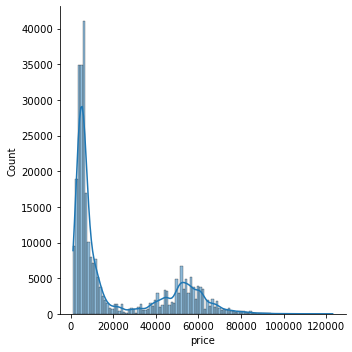

In [13]:
# Plots data with normal distribution curve
sns.displot(df['price'], kde=True)

In [14]:
# Import statistical test for normality
from scipy.stats import shapiro

In [15]:
# Shapiro-Wilk test for normality
stat, p = shapiro(df['price'])
print(f'stat={stat:.4}, p={p:.4}')
if p > 0.05:
    print("Data is normal")
else:
    print("Data is not normal")

stat=0.7523, p=0.0
Data is not normal


C:\Users\jacob\miniconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


> As seen above, the tests show that the price feature is not normally distributed, thus we should use MinMaxScaler. However, StandardScaler will still be used to show how to use it.

### Standard Scaler on price feature

In [16]:
# Get StandardScaler object from sklearn.preprocessing
standard_scaler = StandardScaler()

# Create array containing the scaled values of the features
standard_scaled = standard_scaler.fit_transform(df[['price']])
standard_scaled

array([[-0.65806849],
       [-0.65806849],
       [-0.65793631],
       ...,
       [ 2.56454459],
       [ 2.67407096],
       [ 2.67407096]])

In [17]:
# Mean of scaled data
print(standard_scaled.mean(axis=0))

[-3.63612438e-17]


In [18]:
# Standard deviation of scaled data
print(standard_scaled.std(axis=0))

[1.]


> Notice how the mean is not exactly 0. This does not mean the scaler failed as it only limited with numerical representations. As long as the number is very close to 0, it is perfectly fine. As for the standard deviation, the scaler managed to get 1.

### MinMaxScaler on price

In [19]:
# Get MinMaxScaler object from sklearn.preprocessing
minmax_scaler = MinMaxScaler()

# Create array containing the scaled values of the features
minmax_scaled = minmax_scaler.fit_transform(df[['price']])
minmax_scaled

array([[0.03974878],
       [0.03974878],
       [0.03977338],
       ...,
       [0.6394733 ],
       [0.65985603],
       [0.65985603]])

In [20]:
# Min and max of scaled data
print(min(minmax_scaled), max(minmax_scaled))

[0.] [1.]


> As seen above, the scaler resized the values of the price feature in proportion to the range [0, 1].

# **Congratulations!**
You have finished the notebook and learned how to transform a dataset for a machine learning model. Now, you should be able to handle continuous and categorical features in a dataset. We hope these will help you in your future machine learning projects and push you forward in your data science journey!